## FRB 180916.J0158 + 65: Autocorrelación

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [2]:
data_crudos = pd.read_csv("/home/wattie/frb/conteo.csv", index_col='mjd')
df = data_crudos.dropna()
df.columns

Index(['flux', 'err'], dtype='object')

In [3]:
ts = df["flux"]
ts.head()

mjd
58384.656539    7.474790e-07
58385.656551    1.501550e-08
58386.656563    3.139770e-08
58387.656574    2.708430e-11
58388.656586    2.574390e-11
Name: flux, dtype: float64

Text(0, 0.5, 'Flux')

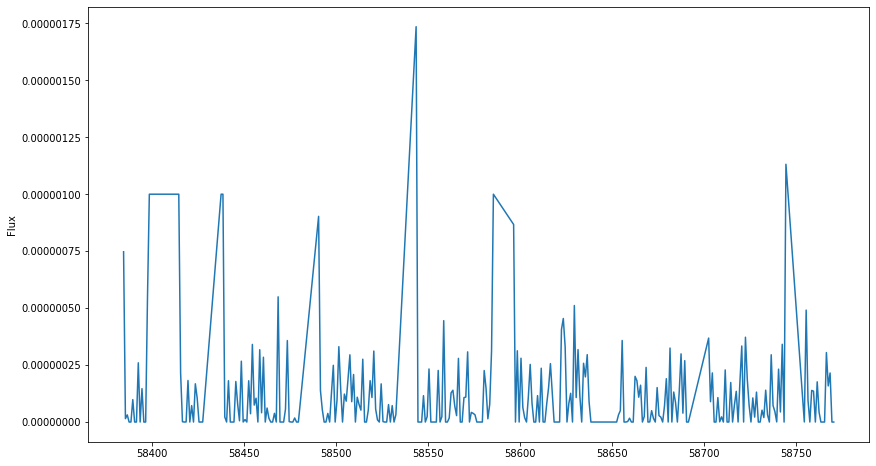

In [12]:
plt.plot(ts)
plt.ylabel("Flux")

### Autocorrelación

In [13]:
from statsmodels.tsa.stattools import acf, pacf 
ts_acf = acf(ts, nlags=100)

/home/wattie/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Autocorrelación')

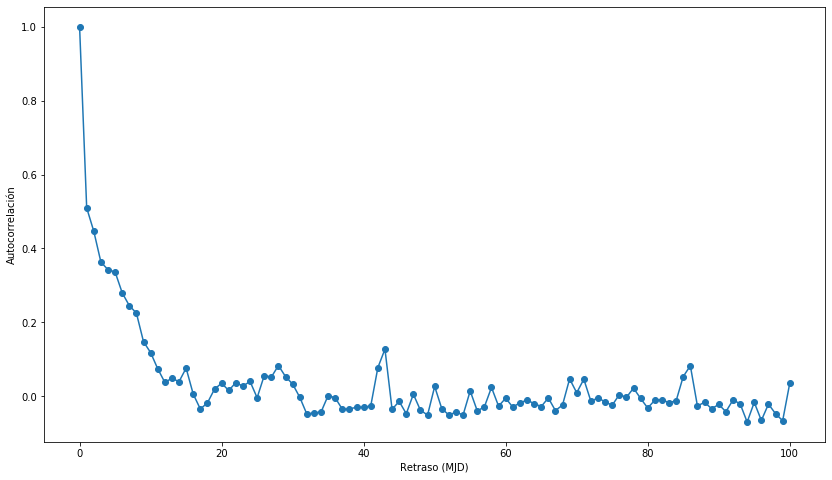

In [15]:
plt.plot(ts_acf,"o-")
ymin,ymax = plt.gca().get_ylim()
#plt.plot([24,24],[ymin,ymax],"--",color="black")
#plt.plot([48,48],[ymin,ymax],"--",color="black")
#plt.plot([72,72],[ymin,ymax],"--",color="black")
#plt.plot([96,96],[ymin,ymax],"--",color="black")
plt.xlabel("Retraso (MJD)")
plt.ylabel("Autocorrelación")

In [16]:
ts_pacf = pacf(ts, nlags=80, method='ols')

Text(0, 0.5, 'Autocorrelación')

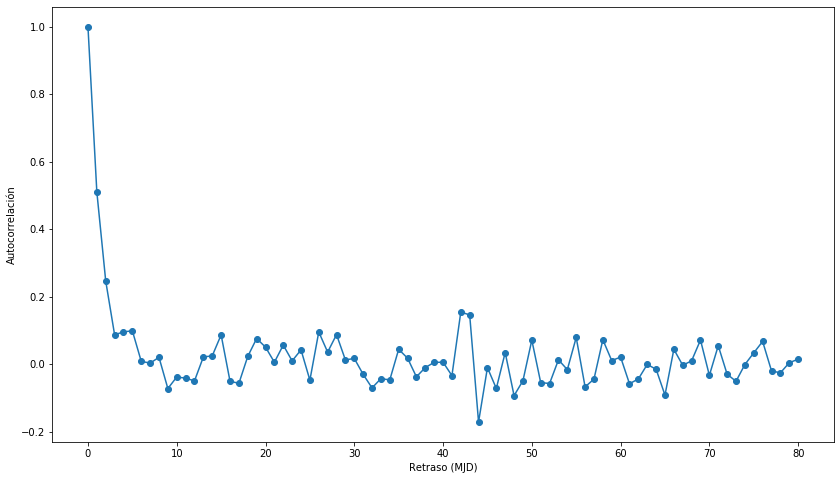

In [17]:
plt.plot(ts_pacf,"o-")
ymin,ymax = plt.gca().get_ylim()
#plt.plot([24,24],[ymin,ymax],"--",color="black")
#plt.plot([48,48],[ymin,ymax],"--",color="black")
#plt.plot([72,72],[ymin,ymax],"--",color="black")
plt.xlabel("Retraso (MJD)")
plt.ylabel("Autocorrelación")

Comparar con la ACF y PACF de una serie de tiempo aleatoria:

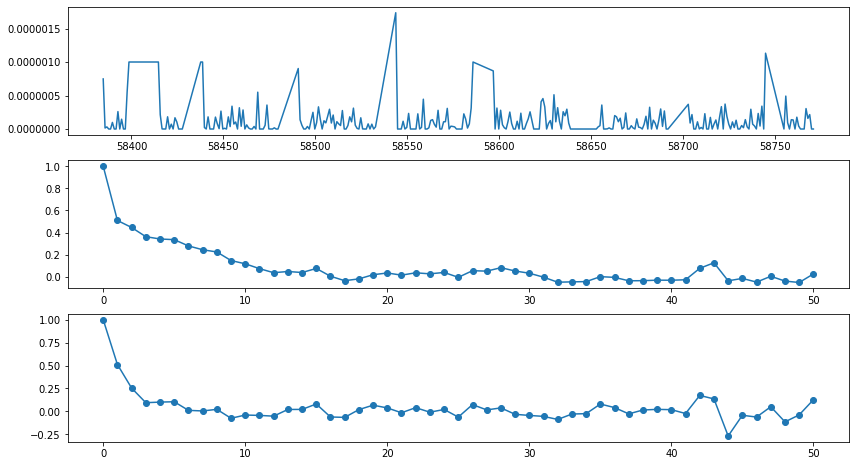

In [22]:
random_ts = ts
plt.subplot(311)
plt.plot(random_ts)
plt.subplot(312)
plt.plot(acf(random_ts,nlags=50),"o-")
plt.subplot(313)
plt.plot(pacf(random_ts,nlags=50),"o-")